<a href="https://colab.research.google.com/github/StephenJohnson-CardiffUni/Astro/blob/main/SunSpot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''Script to take and process sun data from given .fits files
Manually taking down x,y,datetime for each sunspot'''

SOLAR = [ [] for _ in range(14) ]

SOLAR[1] = {
'DATE_OBS':[2002,1,1],
'T':[1,35,30,150],
'CENTER_X':5.124912719727E+02,
'CENTER_Y':5.121821899414E+02,
'R_SUN':4.976492972133E+02,
1:[236,578],
2:[356,589],
3:[458,642],
4:[673,499],
5:[699,656],
6:[740,674],
7:[118,358]
}

SOLAR[2] = {
'DATE_OBS':[2002,1,2],
'T':[6,23,30,143],
'CENTER_X':5.126451416016E+02,
'CENTER_Y':5.121716308594E+02,
'R_SUN':4.976459074648E+02,
1:[359,582],
2:[490,588],
3:[593,624],
4:[798,497],
5:[811,655],
6:[857,639],
7:[206,363]
}

SOLAR[3] = {
'DATE_OBS':[2002,1,3],
'T':[20,43,30,137],
'CENTER_X':5.129639485677E+02,
'CENTER_Y':5.121700744629E+02,
'R_SUN':4.976371283928E+02,
1:[537,586],
2:[671,585],
3:[760,622],
4:[861,467],
5:[927,648],
6:[959,631],
7:[361,367],
8:[44,385]
}

SOLAR[4] = {
'DATE_OBS':[2002,1,5],
'T':[11,11,30,133],
'CENTER_X':5.128095703125E+02,
'CENTER_Y':5.121723937988E+02,
'R_SUN':4.976233208255E+02,
1:[741,586],
2:[832,579],
3:[895,616],
4:[950,468],
7:[530,373],
8:[110,394],
9:[126,645]
}

SOLAR[5] = {
'DATE_OBS':[2002,1,6],
'T':[20,27,30,132],
'CENTER_X':5.129006856283E+02,
'CENTER_Y':5.121798197428E+02,
'R_SUN':4.976072535491E+02,
1:[849,580],
7:[674,375],
8:[211,402],
9:[236,652]
}

SOLAR[6] = {
'DATE_OBS':[2002,1,7],
'T':[23,59,30,131],
'CENTER_X':5.128635253906E+02,
'CENTER_Y':5.121746215820E+02,
'R_SUN':4.975910001418E+02,
1:[935,572],
7:[782,373],
8:[318,405],
9:[352,656],
10:[90,755]
}

SOLAR[7] = {
'DATE_OBS':[2002,1,9],
'T':[6,23,30,130],
'CENTER_X':5.128635253906E+02,
'CENTER_Y':5.121746215820E+02,
'R_SUN':4.975910001418E+02,
1:[993,562],
7:[880,366],
8:[451,406],
9:[512,663],
10:[140,767],
11:[70,382]
}

SOLAR[8] = {
'DATE_OBS':[2002,1,10],
'T':[11,11,30,130],
'CENTER_X':5.127472534180E+02,
'CENTER_Y':5.121821594238E+02,
'R_SUN':4.975698944716E+02,
7:[945,360],
8:[581,404],
9:[657,659],
10:[210,755],
11:[150,408]
}

SOLAR[9] = {
'DATE_OBS':[2002,1,11],
'T':[19,11,30,129],
'CENTER_X':5.131047363281E+02,
'CENTER_Y':5.122049255371E+02,
'R_SUN':4.975174082688E+02,
7:[979,350],
8:[720,399],
9:[800,653],
10:[214,780],
11:[260,420],
12:[58,480],
13:[40,581],
15:[36,318]
}

SOLAR[10] = {
'DATE_OBS':[2002,1,12],
'T':[23,59,30,128],
'CENTER_X':5.130963745117E+02,
'CENTER_Y':5.122990417480E+02,
'R_SUN':4.974876625971E+02,
8:[828,391],
9:[899,644],
10:[423,783],
11:[379,425],
12:[130,492],
13:[97,589],
14:[39,431],
15:[75,627]
}

SOLAR[11] = {
'DATE_OBS':[2002,1,14],
'T':[6,23,30,127],
'CENTER_X':5.128045349121E+02,
'CENTER_Y':5.123047180176E+02,
'R_SUN':4.974528064124E+02,
8:[916,382],
9:[968,636],
10:[545,784],
11:[523,423],
12:[236,502],
13:[191,598],
14:[154,636],
15:[90,440]
}

SOLAR[12] = {
'DATE_OBS':[2002,1,15],
'T':[11,11,30,125],
'CENTER_X':5.128045349121E+02,
'CENTER_Y':5.123047180176E+02,
'R_SUN':4.974528064124E+02,
8:[696,375],
10:[658,783],
11:[653,422],
12:[359,309],
13:[307,605],
14:[170,447],
15:[257,642]
}

SOLAR[13] = {
'DATE_OBS':[2002,1,16],
'T':[17,35,30,123],
'CENTER_X':5.130968627930E+02,
'CENTER_Y':5.122782287598E+02,
'R_SUN':4.973747211434E+02,
10:[767,778],
11:[777,419],
12:[502,513],
13:[448,609],
14:[283,453],
15:[386,485]
}


Fresh, "straight from the photos" data above, Preperation of data for use bellow

In [2]:
'''
Repack Data to be "spot focused" rather than the current "picture focus"
Pictures 1->14
Sunspots 1->15
Each data needs poss[0], date[1],time[2], lat[3], long[4]
'''
import numpy as np
import datetime

spots = [[[[] for i in range(14)] for i in range(5)] for i in range(16)]

for i in range(1,14):#pictures
  for j in range(1,16):#spots

    #Fast esc
    if SOLAR[i].get(j) == None:
      continue
    
    spots[j][0][i] = SOLAR[i].get(j) #X,Y

    spots[j][1][i] = datetime.date(SOLAR[i].get('DATE_OBS')[0],SOLAR[i].get('DATE_OBS')[1],SOLAR[i].get('DATE_OBS')[2])#date as datetime object
    spots[j][2][i] = SOLAR[i].get('T') #time - maybe useless

    #lat
    spots[j][3][i] = np.rad2deg(np.arcsin( ((spots[j][0][i][1])-SOLAR[i].get("CENTER_Y")) / SOLAR[i].get("R_SUN") ))

    #long
    spots[j][4][i] = np.rad2deg(np.arcsin( ((spots[j][0][i][0])-SOLAR[i].get("CENTER_X")) / SOLAR[i].get("R_SUN") ))

In [3]:
'''Tidys out empty entries'''
cleanedList = spots
cleanedList = cleanedList[1:]

for i in range(14,-1,-1):
  # print(cleanedList[i])
  for j in range(4,-1,-1):
    # print(cleanedList[i][j])
    for k in range(13,-1,-1):
      #print(cleanedList[i][j][k])
      if cleanedList[i][j][k] == []:
        del cleanedList[i][j][k]

<ipython-input-3-26e2727f4e98>:11: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if cleanedList[i][j][k] == []:


In [4]:
'''prepares the times for plotting'''
import matplotlib.dates as dts

timeList = [[] for i in range(16)] 

for i in range(len(cleanedList)):
  timeList[i].append(cleanedList[i][1])


for i in range(len(timeList)-1,-1,-1):
  for j in range(len(timeList[i])-1,-1,-1):
    timeList[i][j] = dts.date2num(timeList[i][j])

In [5]:
'''split by latitude'''
meanLats = []
for i in range(15):
  meanLats.append(np.abs(np.mean(cleanedList[i][3])))


'''<10 [0,1,3,11,12,13,14] , 10>x>20 [2,4,5,6,7,8,10] , <20 [9]''' 

'<10 [0,1,3,11,12,13,14] , 10>x>20 [2,4,5,6,7,8,10] , <20 [9]'

Plotting data

Text(0.5, 1.0, 'High Latitude SunSpots')

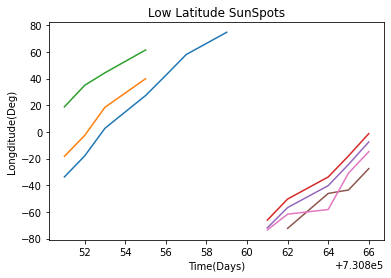

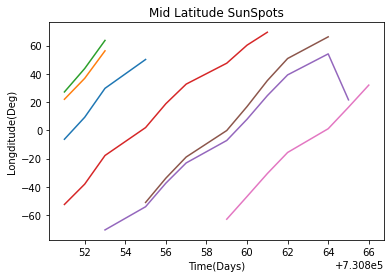

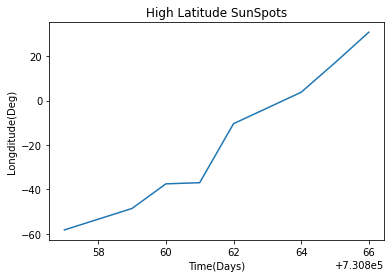

In [11]:
import matplotlib.pyplot as plt

'''low lats'''
timeRange10=[]
longs10=[]
for i in [0,1,3,11,12,13,14]:
  timeRange10.append(timeList[i][0])
  longs10.append(cleanedList[i][4])

for i in range(len(timeRange10)):
  plt.plot(timeRange10[i],longs10[i])
plt.xlabel("Time(Days)")
plt.ylabel("Longditude(Deg)")
plt.title("Low Latitude SunSpots")

plt.figure()

'''med lats'''
timeRange20=[]
longs20=[]
for i in [2,4,5,6,7,8,10]:
  timeRange20.append(timeList[i][0])
  longs20.append(cleanedList[i][4])

for i in range(len(timeRange20)):
  plt.plot(timeRange20[i],longs20[i])
plt.xlabel("Time(Days)")
plt.ylabel("Longditude(Deg)")
plt.title("Mid Latitude SunSpots")
plt.figure()

'''one high lat'''
plt.plot(timeList[9][0],cleanedList[9][4])
plt.xlabel("Time(Days)")
plt.ylabel("Longditude(Deg)")
plt.title("High Latitude SunSpots")

Curve Fit

Spot number 1 has slope of 13.86
Spot number 2 has slope of 14.68
Spot number 3 has slope of 14.21
Spot number 4 has slope of 10.31
Spot number 5 has slope of 17.15
Spot number 6 has slope of 18.24
Spot number 7 has slope of 12.06
Spot number 8 has slope of 9.89
Spot number 9 has slope of 13.30
Spot number 10 has slope of 10.29
Spot number 11 has slope of 12.90
Spot number 12 has slope of 12.26
Spot number 13 has slope of 12.18
Spot number 14 has slope of 10.68
Spot number 15 has slope of 10.92


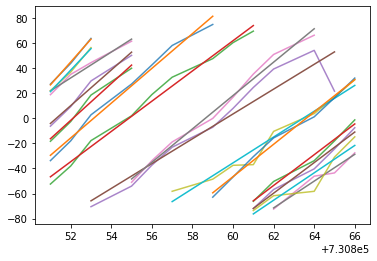

In [13]:
from scipy.optimize import curve_fit

def lineFunc(x,m,c):
  return (m*x)+c


#array for curvefitdatas tolive in
FullcurveData = [ [[]for i in range(2)] for i in range(len(timeList))]

for i in range(len(timeList)-1):
  popt,pcov = curve_fit(lineFunc,timeList[i][0],cleanedList[i][4])
  FullcurveData[i][0] = popt
  FullcurveData[i][1] = pcov
  plt.plot(timeList[i][0],cleanedList[i][4],alpha=0.8)
  plt.plot(timeList[i][0],lineFunc(timeList[i][0],FullcurveData[i][0][0],FullcurveData[i][0][1]))
  print(f"Spot number {i+1} has slope of {FullcurveData[i][0][0]:.2f}")
  

In [9]:
print(cleanedList)

[[[[236, 578], [359, 582], [537, 586], [741, 586], [849, 580], [935, 572], [993, 562]], [datetime.date(2002, 1, 1), datetime.date(2002, 1, 2), datetime.date(2002, 1, 3), datetime.date(2002, 1, 5), datetime.date(2002, 1, 6), datetime.date(2002, 1, 7), datetime.date(2002, 1, 9)], [[1, 35, 30, 150], [6, 23, 30, 143], [20, 43, 30, 137], [11, 11, 30, 133], [20, 27, 30, 132], [23, 59, 30, 131], [6, 23, 30, 130]], [7.600059284030938, 8.066211981281366, 8.531954125372126, 8.531922593144047, 7.8333706118758135, 6.905378160080245, 5.746840691285815], [-33.751680471576556, -17.98354877560477, 2.7684838160727296, 27.29426214248747, 42.487620891998844, 58.033777263355326, 74.77935148353632]], [[[356, 589], [490, 588], [671, 585], [832, 579]], [datetime.date(2002, 1, 1), datetime.date(2002, 1, 2), datetime.date(2002, 1, 3), datetime.date(2002, 1, 5)], [[1, 35, 30, 150], [6, 23, 30, 143], [20, 43, 30, 137], [11, 11, 30, 133]], [8.879757686932967, 8.764536828798596, 8.415547691340494, 7.71777175452391

In [8]:
#@title Hiding old code


# highpopt,highpcov = curve_fit(lineFunc,timeList[9][0],cleanedList[9][4]) #takes an array for uncertainties, do that
# print(f"This sunspot travels at {highpopt[0]:.2f}(±{highpcov[0,0]:.2f}) longitude per day. With a mean lat of {meanLats[9]:.2f}")

# plt.plot(timeList[9][0],lineFunc(timeList[9][0],highpopt[0],highpopt[1]));
# plt.plot(timeList[9][0],cleanedList[9][4]);
# plt.title("Fit Vs Data");


# #array for curvefitdatas tolive in
# curveData = [ [[]for i in range(2)] for i in range(len(timeRange10))]

# for i in range(len(timeRange10)-1):
#   popt,pcov = curve_fit(lineFunc,timeRange10[i],longs10[i])
#   curveData[i][0] = popt
#   curveData[i][1] = pcov
#   plt.plot(timeRange10[i],longs10[i],alpha=0.8)
#   plt.plot(timeRange10[i],lineFunc(timeRange10[i],curveData[i][0][0],curveData[i][0][1]))
#   print(curveData[i][0][0])